In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [87]:
#!pip install yfinance
#!pip install investpy
#!pip install pykrx
#!pip install seaborn
#!pip install workalendar
#!pip install --upgrade finance-datareader

In [88]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
%matplotlib inline

In [89]:
#!pip install pandas-datareader

In [90]:
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2018-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-08


In [91]:
# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [92]:
print(start_date_ +  " : " + end_date_)
print(start_date__ +  " : " + end_date__)

01/01/2018 : 08/01/2021
20180101 : 20210108


In [176]:
# 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung2 = sam_.copy()

# 대표지수 (코스피 200)
kospi_200_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1028")
kospi_200_.columns = ['kospi_200_Open','kospi_200_High','kospi_200_Low','kospi_200_Close','kospi_200_Volume']
kospi_200_ = kospi_200_.drop(['kospi_200_Open','kospi_200_High','kospi_200_Low','kospi_200_Volume'], axis=1)

# 섹터지수 (코스피 200 산업재)
kospi_200_industy_ = stock.get_index_ohlcv_by_date(start_date__, end_date__, "1159")
kospi_200_industy_.columns = ['kospi_200_industy_Open','kospi_200_industy_High','kospi_200_industy_Low','kospi_200_industy_Close','kospi_200_industy_Volume']
kospi_200_industy_ = kospi_200_industy_.drop(['kospi_200_industy_Open','kospi_200_industy_High','kospi_200_industy_Low','kospi_200_industy_Volume'], axis=1)

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# Vix
vix_ = yf.download("^VIX", start=start_date, end=end_date)
vix_.columns = ['vix_Open','vix_High','vix_Low','vix_Close','vix_Adj Close','vix_Volume']
vix_ = vix_.drop(['vix_Open','vix_High','vix_Low','vix_Adj Close','vix_Volume'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# Dow Jones
dow_jones_ = yf.download("^DJI", start=start_date, end=end_date)
dow_jones_.columns = ['dow_jones_Open','dow_jones_High','dow_jones_Low','dow_jones_Close','dow_jones_Adj Close','dow_jones_Volume']
dow_jones_ = dow_jones_.drop(['dow_jones_Open','dow_jones_High','dow_jones_Low','dow_jones_Adj Close','dow_jones_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# 3) MACD 이동평균수렴확산
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung2['macd'] = macd
model_samsung2['macdsignal9'] = macdsignal9
model_samsung2['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [177]:
model_samsung2

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist
날짜,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN,NaN,NaN
2018-01-03,52540,52560,51420,51620,200270,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,NaN,NaN,NaN
2018-01-05,51300,52120,51200,52120,189623,NaN,NaN,NaN
2018-01-08,52400,52520,51500,52020,167673,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-04,81000,84400,80200,83000,38655276,3562.050347,2983.225852,578.824495
2021-01-05,81600,83900,81600,83900,35335669,3856.663080,3157.913297,698.749782
2021-01-06,83300,84500,82100,82200,42089013,3907.921909,3307.915020,600.006889


In [178]:
model_samsung2['KOSPI200'] = kospi_200_
model_samsung2['KOSPI200INDUSTRY'] = kospi_200_industy_
model_samsung2['US'] = exchange_rate_usd_
model_samsung2['VIX'] = vix_
model_samsung2['SNP500'] = snp_500_
model_samsung2['DOWJONES'] = dow_jones_
model_samsung2['NASDAQ'] = nasdaq_
model_samsung2['MSCI_KR'] = MSCI_KR

In [179]:
model_samsung2.fillna(method='pad')

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist,KOSPI200,KOSPI200INDUSTRY,US,VIX,SNP500,DOWJONES,NASDAQ,MSCI_KR
날짜,,,,,,,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN,NaN,NaN,326.00,570.99,1063.21,9.770000,2695.810059,24824.009766,7006.899902,14430
2018-01-03,52540,52560,51420,51620,200270,NaN,NaN,NaN,327.13,570.67,1064.80,9.150000,2713.060059,24922.679688,7065.529785,14580
2018-01-04,52120,52180,50640,51080,233909,NaN,NaN,NaN,324.58,572.72,1062.28,9.220000,2723.989990,25075.130859,7077.910156,14445
2018-01-05,51300,52120,51200,52120,189623,NaN,NaN,NaN,328.97,570.74,1062.09,9.220000,2743.149902,25295.869141,7136.560059,14657
2018-01-08,52400,52520,51500,52020,167673,NaN,NaN,NaN,331.28,569.74,1068.86,9.520000,2747.709961,25283.000000,7157.390137,14791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,81000,84400,80200,83000,38655276,3562.050347,2983.225852,578.824495,399.88,541.18,1086.48,26.969999,3700.649902,30223.890625,12698.450195,19435
2021-01-05,81600,83900,81600,83900,35335669,3856.663080,3157.913297,698.749782,406.03,551.91,1086.42,25.340000,3726.860107,30391.599609,12818.959961,19795
2021-01-06,83300,84500,82100,82200,42089013,3907.921909,3307.915020,600.006889,402.08,540.70,1087.93,25.070000,3748.139893,30829.400391,12740.790039,19550


In [180]:
model_samsung = model_samsung2.dropna() # 결측치가 있는 행 제거

In [181]:
model_samsung

,Open,High,Low,Close,Volume,macd,macdsignal9,macdhist,KOSPI200,KOSPI200INDUSTRY,US,VIX,SNP500,DOWJONES,NASDAQ,MSCI_KR
날짜,,,,,,,,,,,,,,,,
2018-04-10,48540,49220,48040,48880,219687,335.644225,851.142589,-515.498364,313.94,582.58,1064.82,20.469999,2656.870117,24408.000000,7094.299805,14210
2018-04-11,49900,49900,48600,48860,201022,288.241662,738.562403,-450.320741,312.94,582.26,1066.82,20.240000,2642.189941,24189.449219,7069.029785,14205
2018-04-12,49440,49440,48880,49000,249325,258.986189,642.647160,-383.660972,313.22,571.95,1071.04,18.490000,2663.989990,24483.050781,7140.250000,14243
2018-04-13,49600,50180,49400,49800,205566,296.931488,573.504026,-276.572538,314.86,576.67,1071.68,17.410000,2656.300049,24360.140625,7106.649902,14282
2018-04-16,50320,50600,49860,50340,157549,366.353799,532.073980,-165.720182,315.17,576.48,1070.68,16.559999,2677.840088,24573.039062,7156.279785,14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,77400,81300,77300,81000,29417421,3225.842091,2838.519728,387.322363,389.29,517.48,1087.62,22.770000,3732.040039,30409.560547,12870.000000,19005
2021-01-04,81000,84400,80200,83000,38655276,3562.050347,2983.225852,578.824495,399.88,541.18,1086.48,26.969999,3700.649902,30223.890625,12698.450195,19435
2021-01-05,81600,83900,81600,83900,35335669,3856.663080,3157.913297,698.749782,406.03,551.91,1086.42,25.340000,3726.860107,30391.599609,12818.959961,19795


In [182]:
model_samsung2 = model_samsung2.drop(['Open','High','Low','Volume'],axis=1)

In [183]:
#df = pd.read_pickle('C:/Users/user/Desktop/team_project/project/kaggle/all_banks.pickle')

In [186]:
model_samsung2

,Close,macd,macdsignal9,macdhist,KOSPI200,KOSPI200INDUSTRY,US,VIX,SNP500,DOWJONES,NASDAQ,MSCI_KR
날짜,,,,,,,,,,,,
2018-01-02,51020,NaN,NaN,NaN,326.00,570.99,1063.21,9.770000,2695.810059,24824.009766,7006.899902,14430
2018-01-03,51620,NaN,NaN,NaN,327.13,570.67,1064.80,9.150000,2713.060059,24922.679688,7065.529785,14580
2018-01-04,51080,NaN,NaN,NaN,324.58,572.72,1062.28,9.220000,2723.989990,25075.130859,7077.910156,14445
2018-01-05,52120,NaN,NaN,NaN,328.97,570.74,1062.09,9.220000,2743.149902,25295.869141,7136.560059,14657
2018-01-08,52020,NaN,NaN,NaN,331.28,569.74,1068.86,9.520000,2747.709961,25283.000000,7157.390137,14791
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,83000,3562.050347,2983.225852,578.824495,399.88,541.18,1086.48,26.969999,3700.649902,30223.890625,12698.450195,19435
2021-01-05,83900,3856.663080,3157.913297,698.749782,406.03,551.91,1086.42,25.340000,3726.860107,30391.599609,12818.959961,19795
2021-01-06,82200,3907.921909,3307.915020,600.006889,402.08,540.70,1087.93,25.070000,3748.139893,30829.400391,12740.790039,19550


In [173]:
returns = pd.DataFrame()

In [158]:
returns = pd.DataFrame()

In [187]:
tickers = ['Close', 'KOSPI200', 'KOSPI200INDUSTRY', 'US', 'VIX','SNP500','DOWJONES','NASDAQ','MSCI_KR']

for tick in tickers :
    returns[tick + ' Return'] = model_samsung2[tick].pct_change() ## 각 항목들의 수익률을 계산한다.

returns.head()

,Close Return,KOSPI200 Return,KOSPI200INDUSTRY Return,US Return,VIX Return,SNP500 Return,DOWJONES Return,NASDAQ Return,MSCI_KR Return
날짜,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.011760,0.003466,-0.000560,0.001495,-0.063460,0.006399,0.003975,0.008367,0.010395
2018-01-04,-0.010461,-0.007795,0.003592,-0.002367,0.007650,0.004029,0.006117,0.001752,-0.009259
2018-01-05,0.020360,0.013525,-0.003457,-0.000179,0.000000,0.007034,0.008803,0.008286,0.014676
2018-01-08,-0.001919,0.007022,-0.001752,0.006374,0.032538,0.001662,-0.000509,0.002919,0.009142


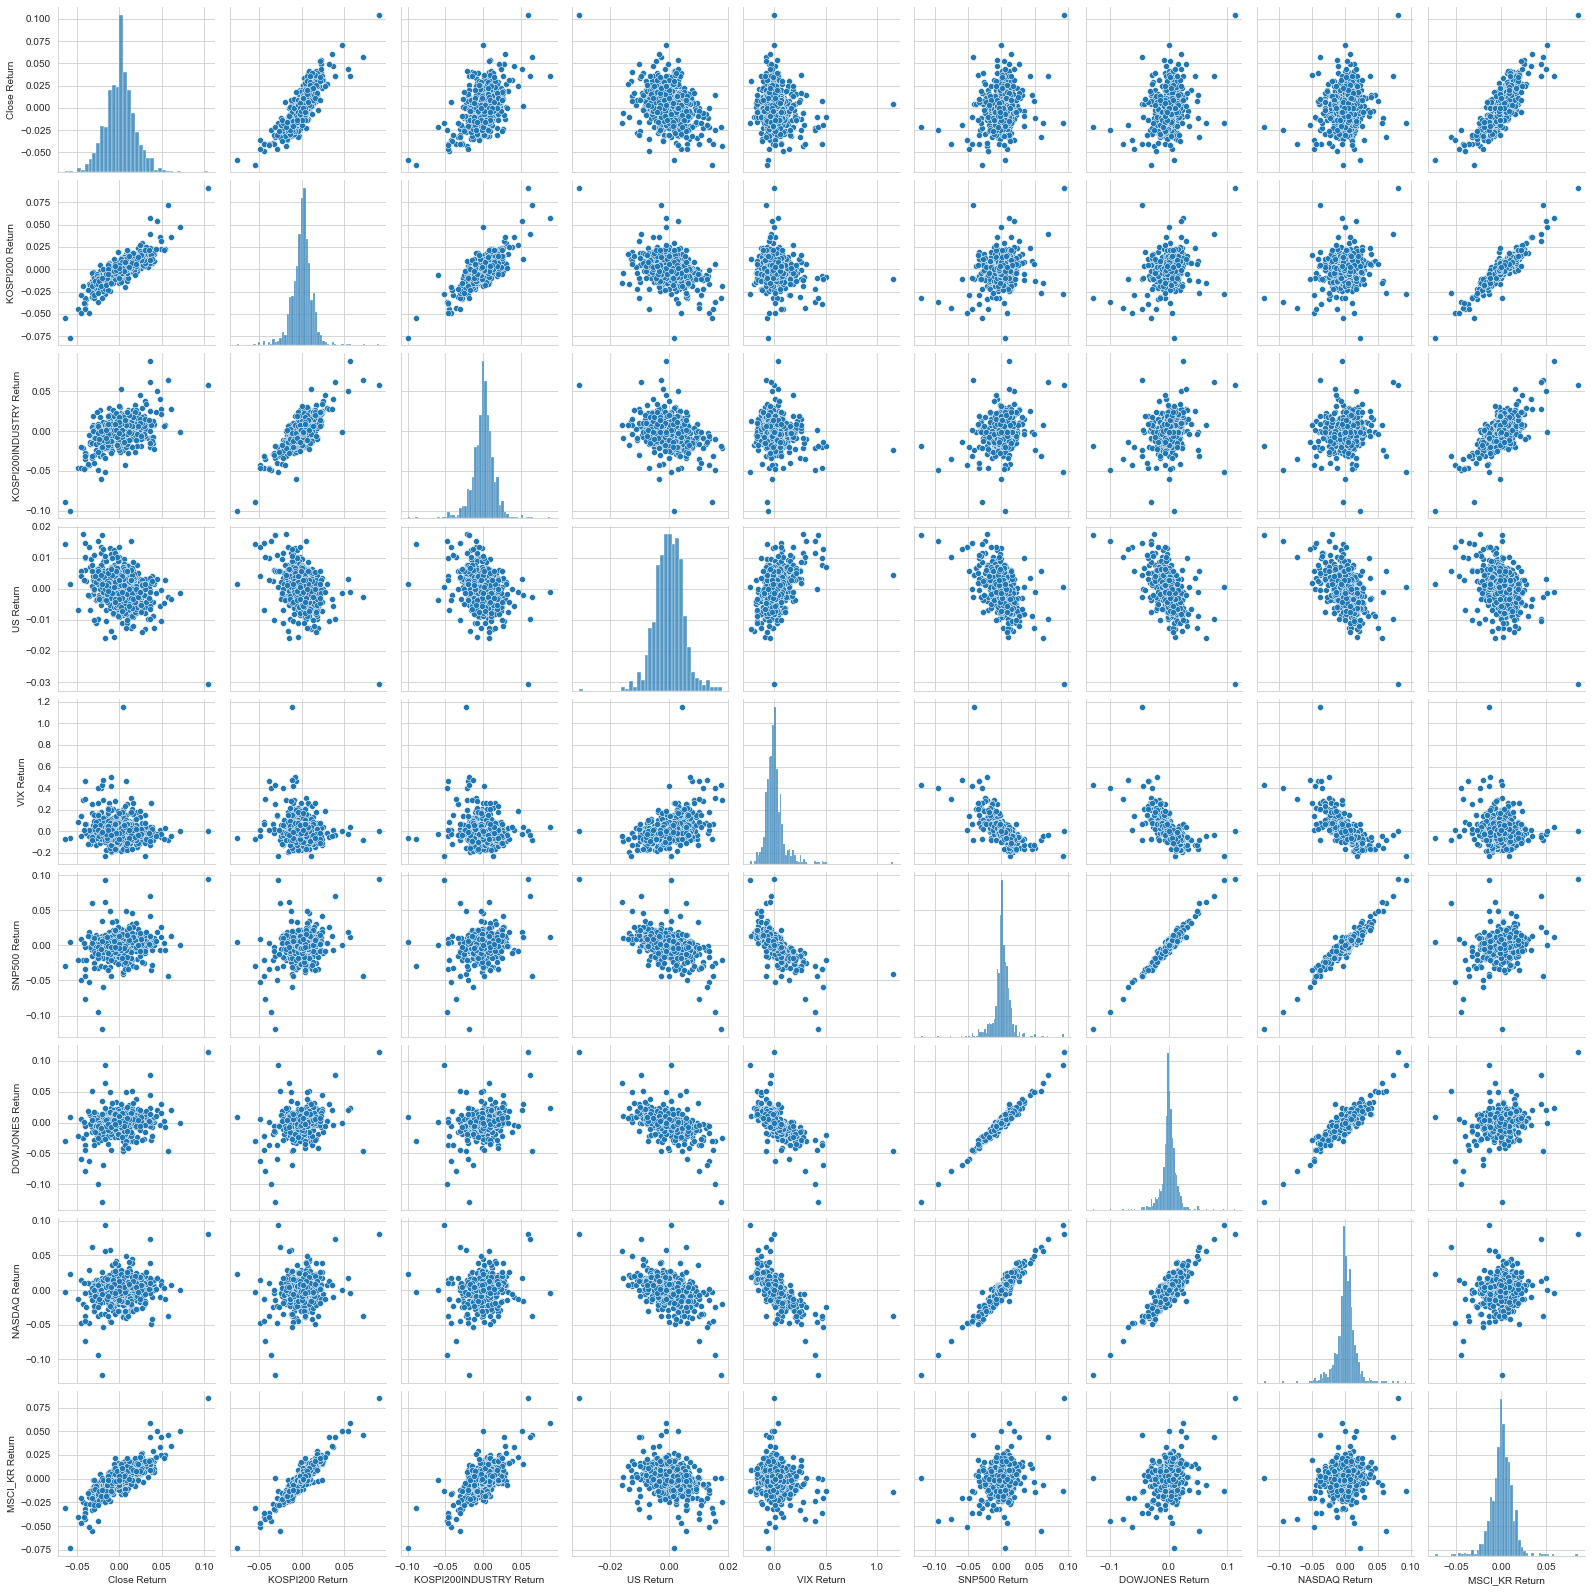

In [189]:
import seaborn as sns
sns.pairplot(returns[1:])

In [130]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

Close Return              2020-03-23
KOSPI200 Return           2020-03-19
KOSPI200INDUSTRY Return   2020-03-19
US Return                 2020-03-24
VIX Return                2020-03-13
SNP500 Return             2020-03-16
DOWJONES Return           2020-03-16
NASDAQ Return             2020-03-16
MSCI_KR Return            2020-03-19
dtype: datetime64[ns]

In [131]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

Close Return              2020-03-24
KOSPI200 Return           2020-03-24
KOSPI200INDUSTRY Return   2020-03-25
US Return                 2020-03-16
VIX Return                2019-05-07
SNP500 Return             2020-03-24
DOWJONES Return           2020-03-24
NASDAQ Return             2020-03-13
MSCI_KR Return            2020-03-24
dtype: datetime64[ns]

In [132]:
returns.std()

Close Return               0.017935
KOSPI200 Return            0.013216
KOSPI200INDUSTRY Return    0.015450
US Return                  0.004902
VIX Return                 0.090847
SNP500 Return              0.015174
DOWJONES Return            0.016059
NASDAQ Return              0.016526
MSCI_KR Return             0.012973
dtype: float64

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Close Return', ylabel='Density'>

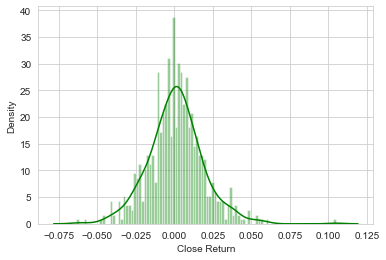

In [133]:
sns.distplot(returns.loc[start_date:end_date]['Close Return'],color='green',bins=100)

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='KOSPI200 Return', ylabel='Density'>

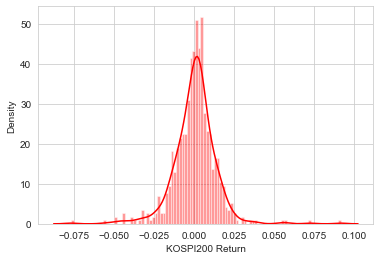

In [134]:
sns.distplot(returns.loc[start_date:end_date]['KOSPI200 Return'],color='red',bins=100)

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='VIX Return', ylabel='Density'>

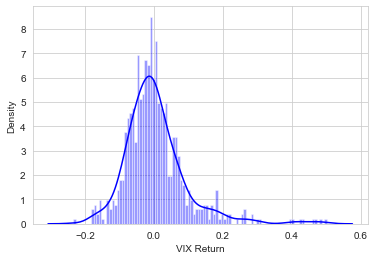

In [135]:
sns.distplot(returns.loc[start_date:end_date]['VIX Return'],color='blue',bins=100)

In [137]:
#!pip install cufflinks

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 51676 missing from current font.



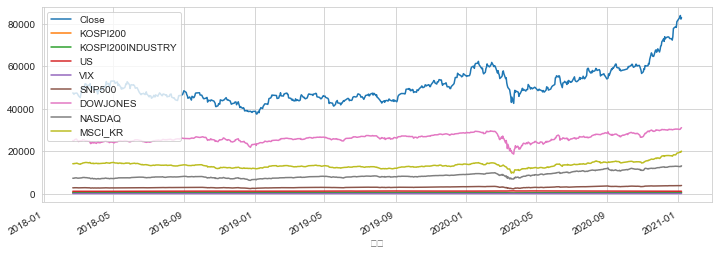

In [139]:
for tick in tickers:
    model_samsung[tick].plot(figsize=(12,4),label=tick)
plt.legend()

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 51676 missing from current font.



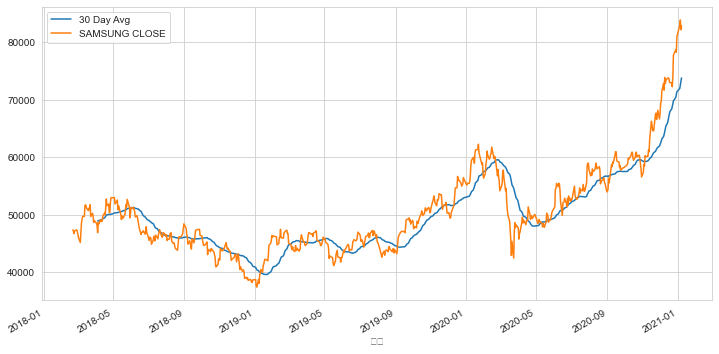

In [141]:
plt.figure(figsize=(12,6))
model_samsung['Close'].loc[start_date:end_date].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['Close'].loc[start_date:end_date].plot(label='SAMSUNG CLOSE')
plt.legend()

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py37_32\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 51676 missing from current font.



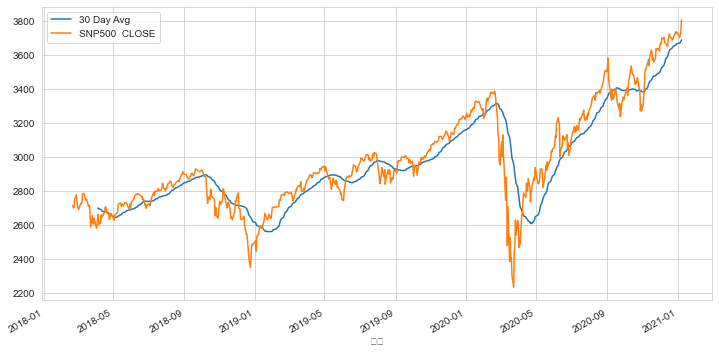

In [142]:
plt.figure(figsize=(12,6))
model_samsung['SNP500'].loc[start_date:end_date].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['SNP500'].loc[start_date:end_date].plot(label='SNP500  CLOSE')
plt.legend()

In [143]:
model_samsung['Close'].loc[start_date:end_date].ta_plot(study='boll')